# Sample Template

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

'''from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K '''

import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import Model


from keras.preprocessing import image
##################################################################################################

In [7]:
model_path = "../model/"

#model = tf.keras.models.load_model('model\\players_model\\')
model = tf.keras.models.load_model(model_path+'players_model')

# Check its architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_574 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_575 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               5308544   
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

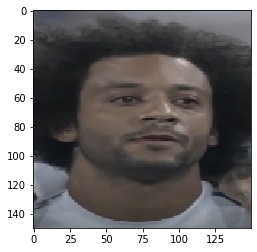

In [23]:
#----------------------------------------- Testing the model -----------------------------------#

test_path = '../players/predict/'
player_path = 'marcelo1.png' 

img=image.load_img(test_path+player_path, target_size=(150, 150))
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

In [24]:
print(classes[0])

if classes[0][0]>0.8:
    print("Cristiano Ronaldo")
elif classes[0][1]>0.8:
    print( "Lionel Messi")
elif classes[0][2]>0.8:
    print("Paulo Dybala")
elif classes[0][3]>0.8:
    print("Sergio Romero")
else:
    print("Unknow")


[1. 0. 0. 0.]
Cristiano Ronaldo


# Detecting in video stream

In [5]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Load the cascade
profileface_cascade = cv2.CascadeClassifier('haarcascade_profileface.xml')

In [6]:
# To capture video from webcam. 
#cap = cv2.VideoCapture(0)
# To use a video file as input 
cap = cv2.VideoCapture('../samples/ronaldovsmessi.mp4')

In [8]:
while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 
                                          scaleFactor=1.2, 
                                          minNeighbors=7,
                                          minSize=(50,50),
                                          flags=cv2.CASCADE_SCALE_IMAGE)
    
    profilefaces = profileface_cascade.detectMultiScale(gray, 
                                          scaleFactor=1.2, 
                                          minNeighbors=7,
                                          minSize=(50,50),
                                          flags=cv2.CASCADE_SCALE_IMAGE)
    
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x-50, y-10), (x+w+50, y+h+50), (255, 0, 0), 2)
    for (x, y, w, h) in profilefaces:
        cv2.rectangle(img, (x-50, y-10), (x+w+50, y+h+50), (0, 255, 0), 2)
    # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
            break
# Release the VideoCapture object
cap.release()